In [97]:
import pandas as pd

Jeopardy = pd.read_csv("JEOPARDY_CSV.csv")

Jeo_df = pd.DataFrame(Jeopardy)
Jeo_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [98]:
# 1a how many rows? there are 216930. row represent a record of instance.
Jeo_df.describe()

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


In [99]:
#1b Clean the data. How do you need to “clean” it? What is “dirty” about this data?    
   #there are extra spaces in column names

Jeo_df.columns = Jeo_df.columns.str.rstrip().str.lstrip()
print(Jeo_df.columns)

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [100]:
year = pd.DatetimeIndex(Jeo_df["Air Date"]).year
Jeo_df["Year"] = year.values

In [101]:
Jeo_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004


In [102]:
#1c how many unique show were there each year?
year_by = Jeo_df.groupby("Year")

year_by['Show Number'].nunique()

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64

In [103]:
#1d how many times each category used?
print
cat = Jeo_df["Category"].value_counts()
print(cat)

BEFORE & AFTER            547
SCIENCE                   519
LITERATURE                496
AMERICAN HISTORY          418
POTPOURRI                 401
                         ... 
EVENTS OF 2010              1
SUMMER OLYMPIC VENUES       1
WORLDWIDE MEDIA             1
THE BUSINESS BOOKSHELF      1
HEALTH                      1
Name: Category, Length: 27983, dtype: int64


In [104]:
#1e which month (over the years) has had the most shows?
month = pd.DatetimeIndex(Jeo_df["Air Date"]).month
month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
           dtype='int64', name='Air Date', length=216930)

In [105]:
Jeo_df["Month"] = month.values
Jeo_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year,Month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12


In [106]:
#1e Which month (over the years) has had the most shows?  # November

Jeo_df['Month'].value_counts()

11    25672
1     21128
5     21052
12    20875
10    20510
3     19731
4     19654
6     19331
2     17501
9     16053
7     15423
Name: Month, dtype: int64

In [107]:
#1f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

Jeo_df["Answer"].value_counts()

China                          216
Australia                      215
Japan                          196
Chicago                        194
France                         193
                              ... 
sufficient                       1
Cayuse                           1
The Boogie Woogie Bugle Boy      1
gold & silver                    1
Coleco                           1
Name: Answer, Length: 88236, dtype: int64

In [45]:
que_china = Jeo_df['Answer'] == "China"

Jeo_df[que_china]['Question']

598       In 1958 this country launched its second 5-yea...
1507      In 1999 this country began 3 "golden weeks" of...
3050      P.F. Chang's is an upscale bistro specializing...
3476      This country's National People's Congress has ...
5990      Of the 6 nations India borders, this one is th...
                                ...                        
214506    Principal mountain ranges in this large countr...
215115                                      Dr. Sun Yat-Sen
215556                                             Tsingtao
215912    Because of a policy adopted in 1979, this coun...
216150    Colorful patches called p'u-fang used to indic...
Name: Question, Length: 216, dtype: object

In [24]:
que_aus = Jeo_df['Answer'] == "Australia"

Jeo_df[que_aus]['Question']

560       A 1994 festival honoring this country featured...
688       Large aboriginal populations live in this coun...
1236      Papua New Guinea is just off this country's Ca...
3175      In 1962 this country's Dawn Fraser became the ...
4373         It's the lowest, flattest & smallest continent
                                ...                        
212513    The good folk at gdaypubs.com are making a maj...
212711    Eons of wind & rain have worn away ancient mtn...
213583    Dedicated to upholding this nation's constitut...
214876    If you stay at Cradle Mountain Lodge in this c...
216044    Norfolk Island & the Republic of Kiribati use ...
Name: Question, Length: 215, dtype: object

In [25]:
que_japan = Jeo_df['Answer'] == "Japan"

Jeo_df[que_japan]['Question']

404       In February 1904 this country attacked the Rus...
874       Sanma aisu is fish-flavored ice cream & taco a...
1864      The monster seen here (Godzilla) originally ap...
3106      The mauve flowers of the Paulownia tree adorn ...
4080      This country's 12th century sculptor Unkei is ...
                                ...                        
211129    On Feb. 8, 1904 this country attacked Port Art...
214711    This nation's maritime self-defense force, suc...
215513    On July 8, 1853 Matthew Perry presented a lett...
215568                                                Kirin
216660            In Asia: Prime Minister Junichiro Koizumi
Name: Question, Length: 196, dtype: object

In [65]:
#2 

cat = Jeo_df["Category"].value_counts()

cat_df = pd.DataFrame(cat)
cat5_df = pd.DataFrame(cat_df.head())
cat5_df

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


<ipython-input-108-d55ec9c0c038>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = cat5_df.index, rotation=90)


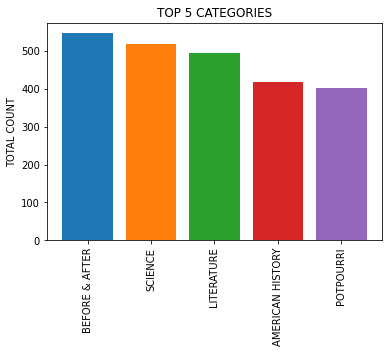

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

ax.bar("BEFORE & AFTER", cat5_df["Category"][0])
ax.bar("SCIENCE", cat5_df["Category"][1])
ax.bar("LITERATURE", cat5_df["Category"][2])
ax.bar("AMERICAN HISTORY", cat5_df["Category"][3])
ax.bar("POTPOURRI", cat5_df["Category"][4])
ax.set_title("TOP 5 CATEGORIES")
ax.set_xticklabels(labels = cat5_df.index, rotation=90)

ax.set_ylabel("TOTAL COUNT")
plt.show()